# 数据分析

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from datetime import datetime

## 载入数据

丢弃部分字段：

字段 | 分类 | 处理方式
---|---|---
ship_name | 杂讯 | 丢弃
ship_mobile | 类别特征 | 重新编码
order_id | 无关分析 | 丢弃
total_amount | 数值特征 | ~~剔除异常值(0)，转成对数~~ 稍后决定
final_amount | 重复信息 | 丢弃
pay_status | 类别特征 | 使用
ship_status | 类别特征 | 使用
is_delivery | 无识别度 | 丢弃
try_order | 无识别度 | 丢弃
erp_order_id | 数值特征 | {0, 1}
erp_status | 数值特征 | 重新编码
createtime | 数值特征 | 转换成日期
last_modified | 数值特征 | 转换成日期
payment | 类别特征 | 重新编码
shipping_id | 无识别度 | 丢弃
shipping | 类别特征 | 重新编码
member_id | 类别特征 | 重新编码
promotion_type | 类别特征 | 重新编码
group_id | 类别特征 | 重新编码
groupOn_id | 类别特征 | 重新编码
is_leader | 数值特征 | {0, 1}
is_prepare | 无识别度 | 丢弃
group_num | 数值特征 | {0, 3}
status | 类别特征 | 重新编码
confirm_delivery | 类别特征 | 重新编码
confirm | 无识别度 | 丢弃
ship_area | 类别特征 | 抽取区码
weight | 数值特征 | ~~剔除异常值(0)，转成对数~~ 稍后决定
tostr | 无关分析 | 丢弃
itemnum | 数值特征 | 使用
ip | 杂讯 | 丢弃
ship_addr | 重复信息 | 丢弃
ship_zip | 无关分析 | 丢弃
ship_tel | 重复信息 | 丢弃
ship_email | 无识别度 | 丢弃
ship_time | 类别特征 | 抽取时段，重新编码
cost_item | 数值特征 | ~~剔除异常值(0)，转成对数~~ 稍后决定
is_tax | 数值特征 | {False, True}
tax_type | 类别特征 | 重新编码
cost_tax | 无识别度 | 丢弃
is_protect | 无识别度 | 丢弃
cost_protect | 无识别度 | 丢弃
cost_payment | 无识别度 | 丢弃
currency | 无识别度 | 丢弃
cur_rate | 无识别度 | 丢弃
advance | 数值特征 | ~~剔除异常值(0)，转成对数~~ 稍后决定
score_u | 数值特征 | ~~剔除异常值(0)，转成对数~~ 稍后决定
score_g | 数值特征 | ~~剔除异常值(0)，转成对数~~ 稍后决定
discount | 数值特征 | 转成正数
pmt_goods | 数值特征 | 使用
pmt_order | 数值特征 | 使用
payed | 杂讯 | 丢弃
disabled | 无识别度 | 丢弃
displayonsite | 数值特征 | {False, True}
mark_type | 无识别度 | 丢弃
cost_freight | 数值特征 | 使用
extend | 无识别度 | 丢弃
order_refer | 无识别度 | 丢弃
addon | 杂讯 | 丢弃
source | 类别特征 | 重新编码
city_link | 数值特征 | {0, 1, 2}
verify_city_link | 数值特征 | {-1，0，1，2}
fuzzy | 数值特征 | {0,1}
longitude | 数值特征 | ~~剔除异常值~~ 稍后决定
latitude | 数值特征 | ~~剔除异常值~~ 稍后决定
scalping | 数值特征 | {False, True}
out_trade_no | 无关分析 | 丢弃
autoSendErp | 数值特征 | {False,True}
autoSendErpStatus | 类别特征 | {0, 1, 2}
string_tag_id | 杂讯 | 丢弃
lang | 类别特征 | 重新编码
delivery_note_price | 类别特征 | 重新编码

In [3]:
# 选取需要的字段
cols = ['ship_mobile', 'total_amount', 'pay_status', 'ship_status', 'erp_order_id', 'erp_status',
        'createtime', 'last_modified', 'payment', 'shipping', 'member_id', 'promotion_type',
        'group_id', 'groupOn_id', 'is_leader', 'group_num', 'status', 'confirm_delivery', 'ship_area',
        'weight', 'itemnum', 'ship_time', 'cost_item', 'is_tax', 'tax_type', 'advance',
        'score_u', 'score_g', 'discount', 'pmt_goods', 'pmt_order', 'displayonsite', 'cost_freight',
        'source', 'city_link', 'verify_city_link', 'fuzzy', 'longitude', 'latitude', 'scalping',
        'autoSendErp', 'autoSendErpStatus', 'lang', 'delivery_note_price']

df = pd.read_excel('test_data.xls', usecols=cols)
df.shape

(5881, 44)

## 基本统计观察

In [4]:
# top 10 常客
df.ship_mobile.value_counts().head(10)

17166769648    23
16143545425    22
16143452034    14
17015859490    13
17131246473    13
17188915242    13
16104542317    12
16103411770    11
16140271796    11
16594905358    11
Name: ship_mobile, dtype: int64

In [5]:
# top 10 顾客
df.groupby('ship_mobile')['total_amount'].sum().sort_values(ascending=False).head(10)

ship_mobile
16025631922    6718.00
17166769648    6420.86
16143545425    5002.66
16143452034    3969.50
17015859490    3603.17
16104542317    3599.37
16143852933    3503.90
17131246473    3332.54
16594856439    3140.21
16165729992    2910.70
Name: total_amount, dtype: float64

- 客户 17166769648 订单数22，总消费金额6420.86，绝对是VIP

In [6]:
# 观察 total_amount
df.total_amount.describe()

count    5881.000000
mean      109.929809
std       146.618477
min         0.000000
25%        16.000000
50%        80.000000
75%       176.000000
max      5994.000000
Name: total_amount, dtype: float64

- 平均购买金额约 110
- 购买金额差异颇大 (std=146.618477)
- 最小购买金额0， 最大购买金额 5994

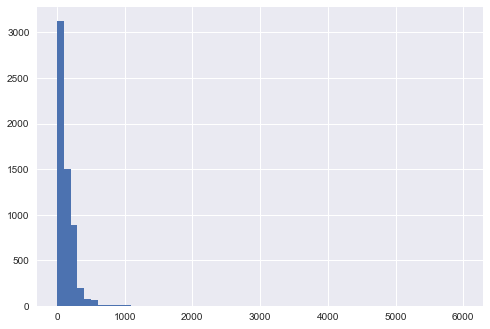

In [7]:
# 用 bar chart 观察消费分布
df.total_amount.hist(bins=60)

In [8]:
# 对消费金额分组
cats = pd.cut(df.total_amount, bins=linspace(0,6000,61)).value_counts()
cats = cats[cats != 0]
cats

(0, 100]        2694
(100, 200]      1516
(200, 300]       869
(300, 400]       193
(400, 500]        82
(500, 600]        51
(900, 1000]       12
(600, 700]        10
(700, 800]         5
(800, 900]         4
(1000, 1100]       3
(1300, 1400]       1
(1100, 1200]       1
(5900, 6000]       1
Name: total_amount, dtype: int64

用 1000元 将购买行为分成两部分
- 一般消费者
- 高端消费者

In [9]:
# 一般消费者
df1 = df[df.total_amount < 1000]
df1.total_amount.describe()

count    5868.000000
mean      106.992922
std       117.425926
min         0.000000
25%        16.000000
50%        79.000000
75%       175.000000
max       994.000000
Name: total_amount, dtype: float64

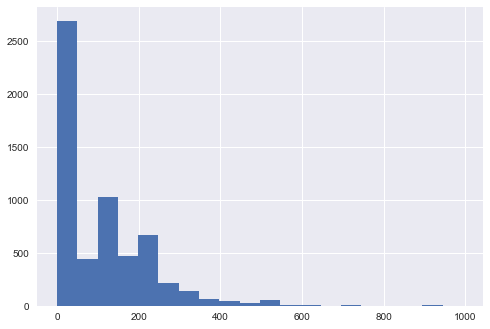

In [10]:
df1.total_amount.hist(bins=20)

In [11]:
# 发现消费金额为 0 的订单
df0 = df[df.total_amount == 0]
len(df0)

439

应该追查原因
- 为何放弃购买：价格太贵？找不到想买的？购物车设计不良？
- 那些人放弃购买：来乱的？熟客？
- 什么时间：商品缺货？竞争对手促销？
- 放弃购买时购物车里有哪些商品？
- 放弃购买的人地理分布：距离太远、运送时间太久？

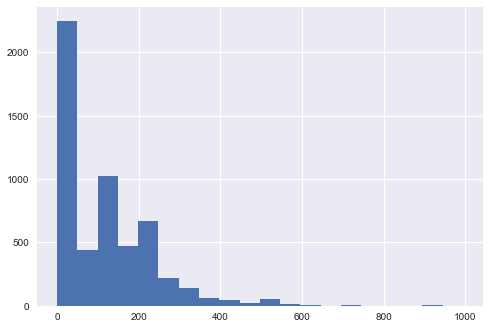

In [12]:
# 移除0元订单
df1 = df1[df1.total_amount != 0]
df1.total_amount.hist(bins=20)

In [13]:
# 观察1000元以上的订单
df2 = df[df.total_amount >= 1000]
df2.groupby('ship_mobile')['total_amount'].agg(['count','sum'])

,count,sum
ship_mobile,,
16025631922,1,5994.00
16027987710,1,1303.60
16047130497,2,2000.00
16058109885,1,1000.00
16073163745,1,1096.60
16111321232,1,1000.00
16140231576,1,1081.00
16143852933,1,1033.10
16166056665,1,1000.00


In [14]:
# 查看客户 16025631922
mobile_16025631922 = df[df.ship_mobile == 16025631922]
mobile_16025631922

,ship_mobile,total_amount,pay_status,ship_status,erp_order_id,erp_status,createtime,last_modified,payment,shipping,...,city_link,verify_city_link,fuzzy,longitude,latitude,scalping,autoSendErp,autoSendErpStatus,lang,delivery_note_price
1726,16025631922,5994.0,1,1,1,succ,1484367354,1484646661,alipay,一米市集直送,...,1.0,1.0,0,121.639651,31.324147,False,True,1,simplified_chinese,display
1965,16025631922,724.0,1,1,1,succ,1484535563,1484785861,alipay,一米市集直送,...,1.0,1.0,0,121.639651,31.324147,False,True,0,simplified_chinese,display


In [15]:
100 * mobile_16025631922.total_amount.sum() / df.total_amount.sum()

1.0391382898554062

虽然只下了两次单，但人家好歹也占营业额1%啊！这个“泠客戶”值得注意

In [16]:
# 发现一个有趣的现象: 好几张订单金额都是1000，呼应某种促销活动吗？
df2[df2.total_amount % 1000 == 0]

,ship_mobile,total_amount,pay_status,ship_status,erp_order_id,erp_status,createtime,last_modified,payment,shipping,...,city_link,verify_city_link,fuzzy,longitude,latitude,scalping,autoSendErp,autoSendErpStatus,lang,delivery_note_price
1010,16047130497,1000.0,0,0,1,normal,1484829136,1484830983,online,一米市集直送,...,0.0,NaN,0,NaN,NaN,False,True,0,simplified_chinese,display
1011,16047130497,1000.0,0,0,1,normal,1484829275,1484831104,online,一米市集直送,...,0.0,NaN,0,NaN,NaN,False,True,0,simplified_chinese,display
1265,16058109885,1000.0,0,0,1,normal,1483953385,1483955222,online,一米市集直送,...,0.0,NaN,0,NaN,NaN,False,True,0,simplified_chinese,display
1429,16941369693,1000.0,0,0,1,normal,1484080679,1484082483,online,一米市集直送,...,0.0,NaN,0,NaN,NaN,False,True,0,simplified_chinese,display
2935,17188596867,1000.0,1,1,1,succ,1485066953,1485331441,alipay,一米市集直送,...,1.0,1.0,1,121.390661,31.325194,False,True,0,simplified_chinese,display
3490,16111321232,1000.0,1,1,1,succ,1486304324,1489917642,wxpayjsapi,一米市集直送,...,0.0,0.0,0,121.452639,31.217353,False,True,0,simplified_chinese,display
3576,16166056665,1000.0,0,0,0,normal,1486536224,1487305767,alipay,一米市集直送,...,0.0,0.0,1,121.516388,31.160659,False,True,0,simplified_chinese,display
